In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
warnings.simplefilter("ignore")

In [24]:
train=pd.read_csv(r"C:\Users\rohan\Downloads\Compressed\archive\train.csv")

In [25]:
test =pd.read_csv(r"C:\Users\rohan\Downloads\Compressed\archive\test.csv")

In [26]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [27]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [28]:
columns=train.columns

In [29]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
train.columns = columns
test.columns = columns

In [30]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [31]:
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


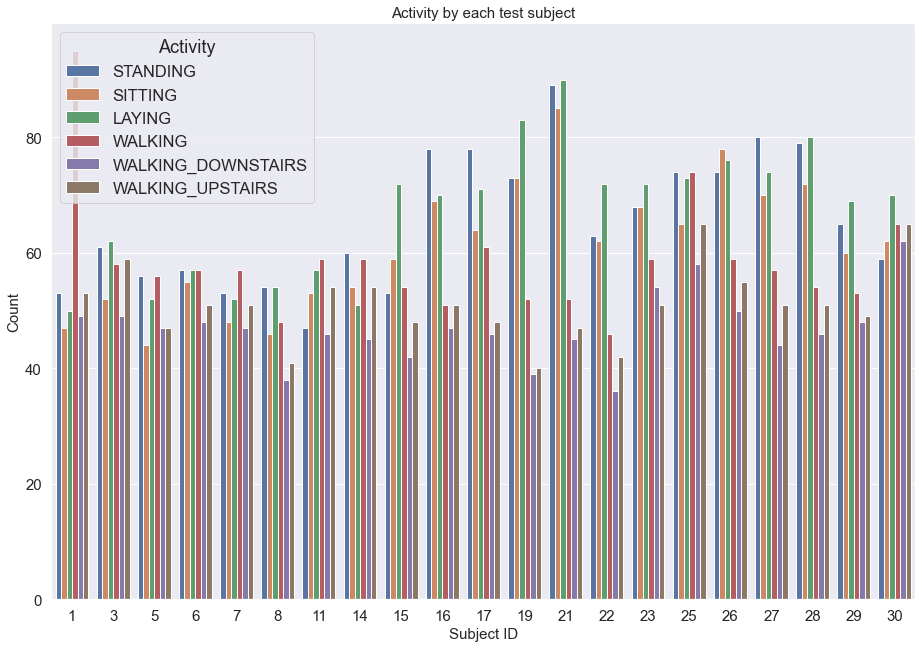

In [32]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = "Activity", data = train)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

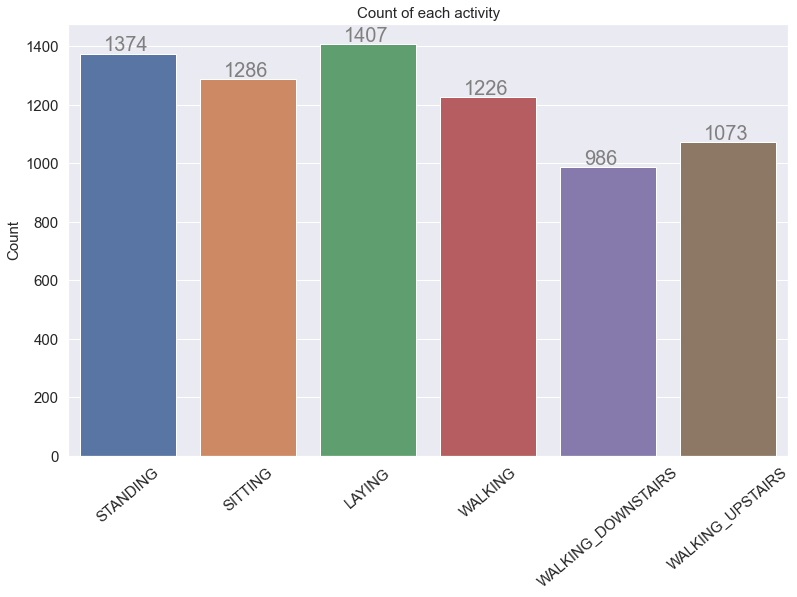

In [33]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "Activity", data = train)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

([<matplotlib.patches.Wedge at 0x1031aff86a0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

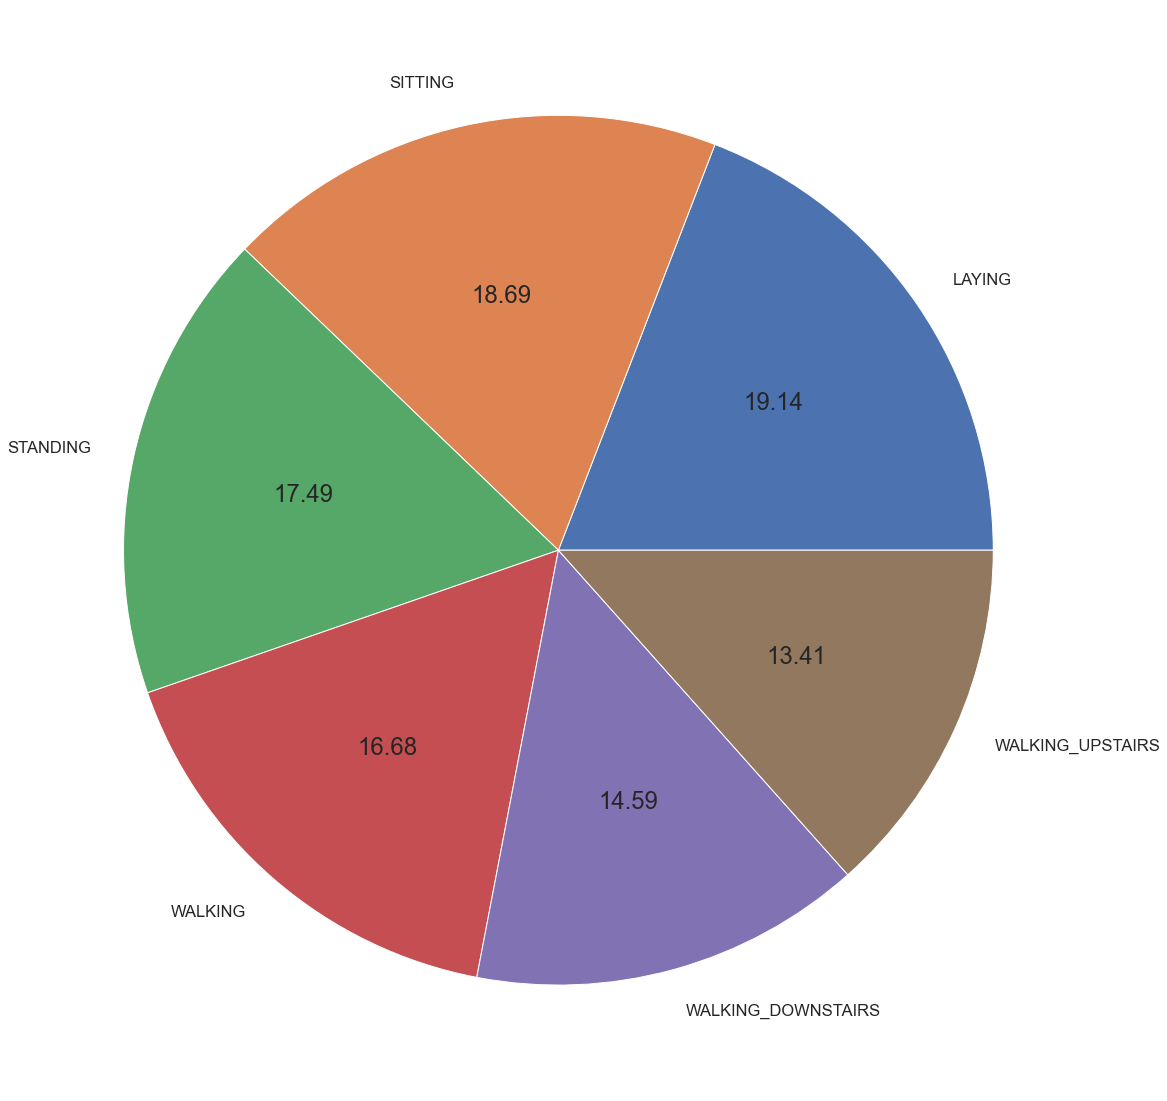

In [72]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
plt.rcParams.update({'figure.figsize': [20, 20], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

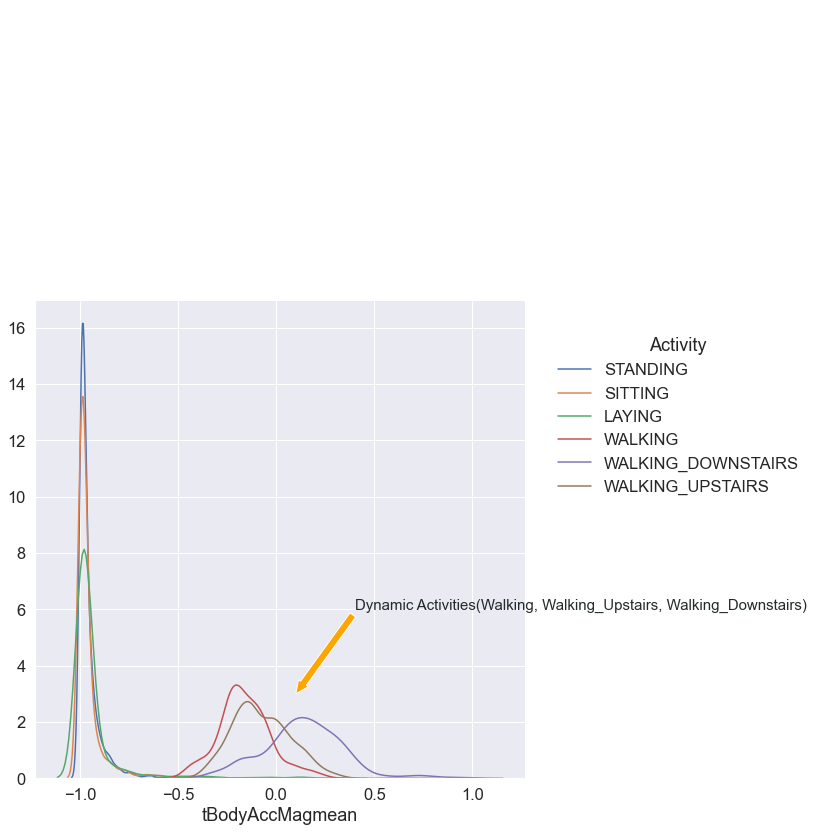

In [75]:
facetgrid = sns.FacetGrid(data = train, hue = "Activity", size = 8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")
plt.show()


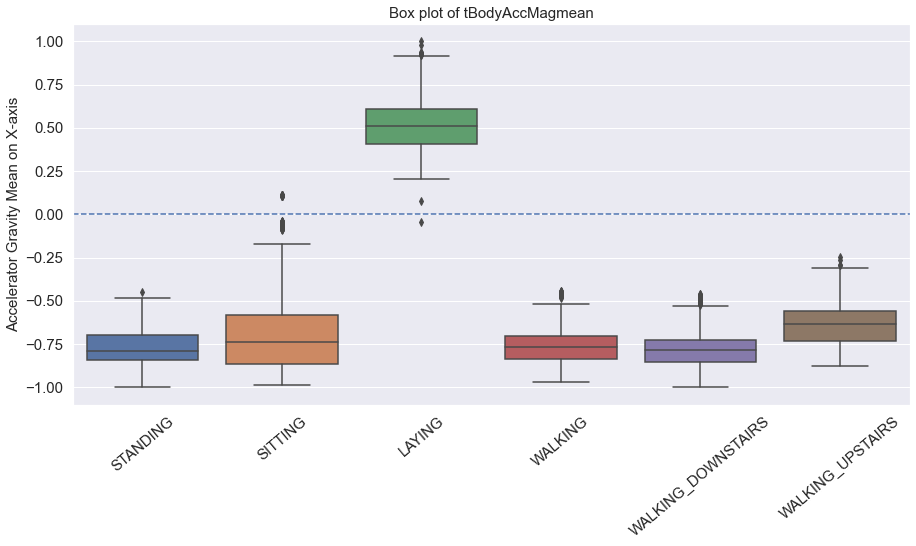

In [74]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "angleXgravityMean", showfliers = True, data = train)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

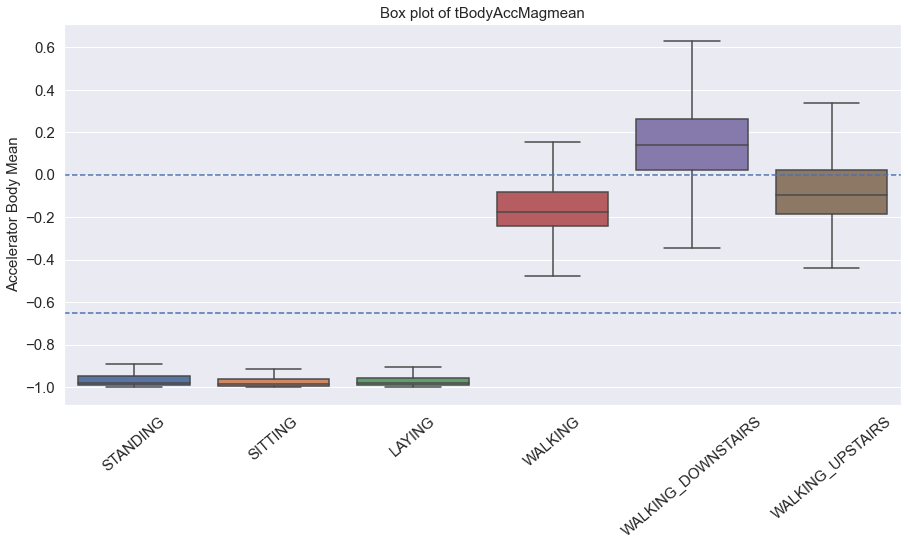

In [36]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "tBodyAccMagmean", showfliers = False, data = train)
plt.axhline(y = -0.65, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Body Mean", fontsize = 15)
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

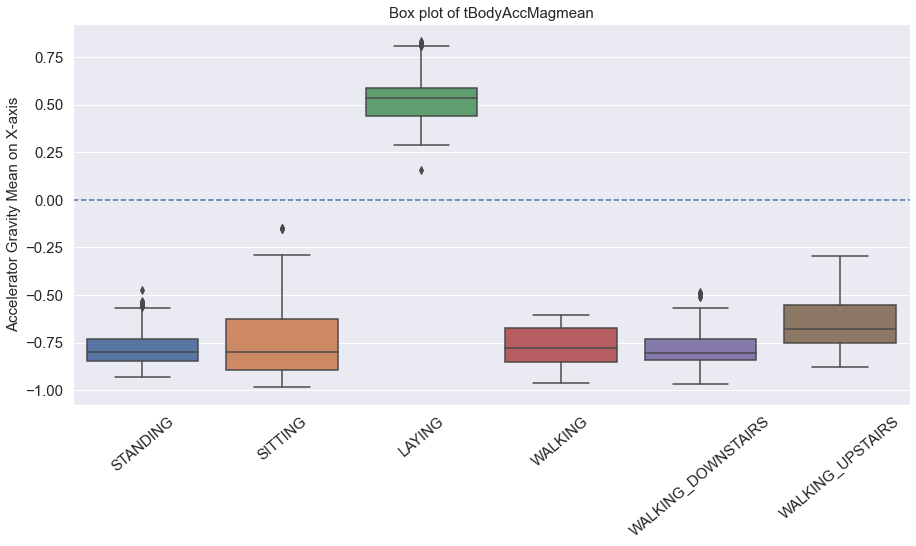

In [37]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "angleXgravityMean", showfliers = True, data = test)
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Gravity Mean on X-axis", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

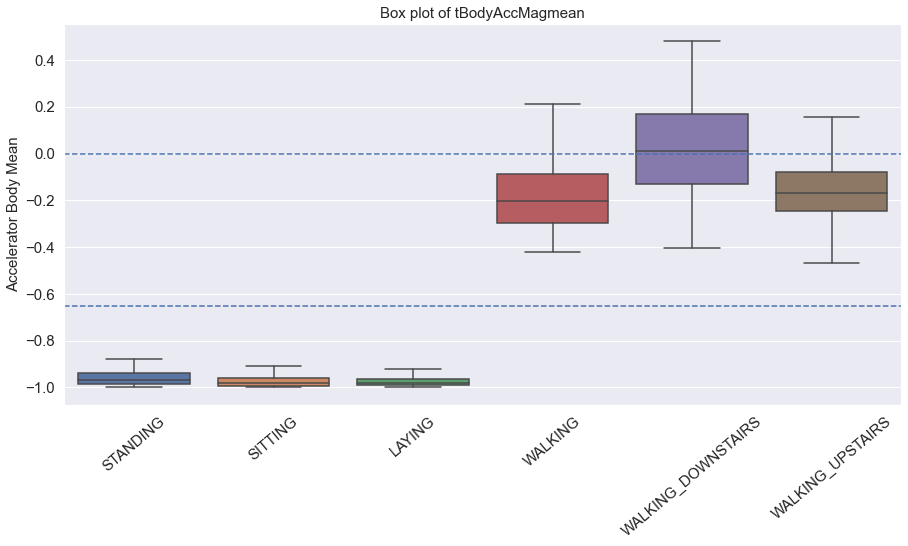

In [38]:
plt.figure(figsize = (15, 7))
sns.boxplot(x = "Activity", y = "tBodyAccMagmean", showfliers = False, data = test)
plt.axhline(y = -0.65, linestyle = "--")
plt.axhline(y = 0, linestyle = "--")
plt.title("Box plot of tBodyAccMagmean", fontsize = 15)
plt.ylabel("Accelerator Body Mean", fontsize = 15)
plt.xlabel("Activity Name", fontsize = 15)
plt.xlabel("")
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

In [39]:
x_train = train.drop(["subject", "Activity"], axis = 1)
y_train = train["Activity"]

x_test = test.drop(["subject", "Activity"], axis = 1)
y_test = test["Activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [40]:
table = pd.DataFrame(columns = ["Model", "Accuracy(%)"])
def keeping_record(model_name, accuracy):
    global table
    table = table.append(pd.DataFrame([[model_name, accuracy]], columns = ["Model", "Accuracy(%)"]))
    table.reset_index(drop = True, inplace = True)

In [41]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [42]:
def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print(str(accuracy)+"%\n")
    
    print('---------------------------')
    print('|      Best Estimator      |')
    print('---------------------------')
    print("{}\n".format(cross_val.best_estimator_))
    
    print('----------------------------------')
    print('|      Best Hyper-Parameters      |')
    print('----------------------------------')
    print(cross_val.best_params_)
    
    keeping_record(model_name, accuracy)
    
    print("\n\n")
    
    print_confusionMatrix(y_test, predicted_points)

In [52]:
df1=train.drop(['tBodyAccmeanX','tBodyAccmeanY','tBodyAccmeanZ'],axis=1)
df2=test.drop(['tBodyAccmeanX','tBodyAccmeanY','tBodyAccmeanZ'],axis=1)

In [53]:
x_train = df1.drop(["subject", "Activity"], axis = 1)
y_train = df1["Activity"]

x_test = df2.drop(["subject", "Activity"], axis = 1)
y_test = df2["Activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 558), (7352,), (2947, 558), (2947,))

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:01:26.204070

---------------------
|      Accuracy      |
---------------------
96.47%

---------------------------
|      Best Estimator      |
---------------------------
LogisticRegression(C=400, multi_class='ovr')

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 400, 'penalty': 'l2'}





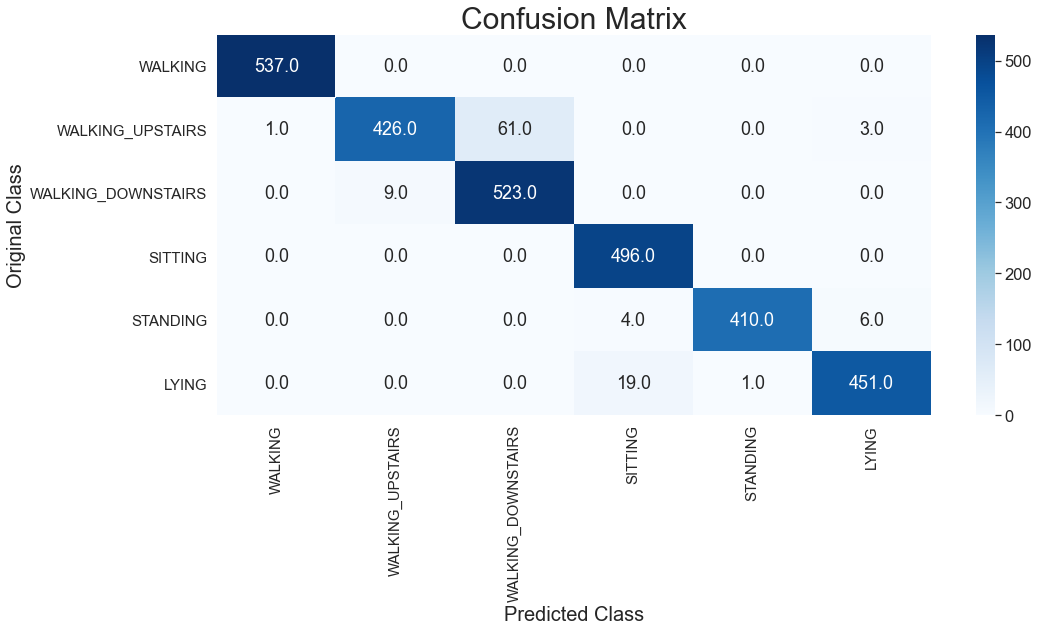

-----------------------------------------------------------------------------------------------------------------------------


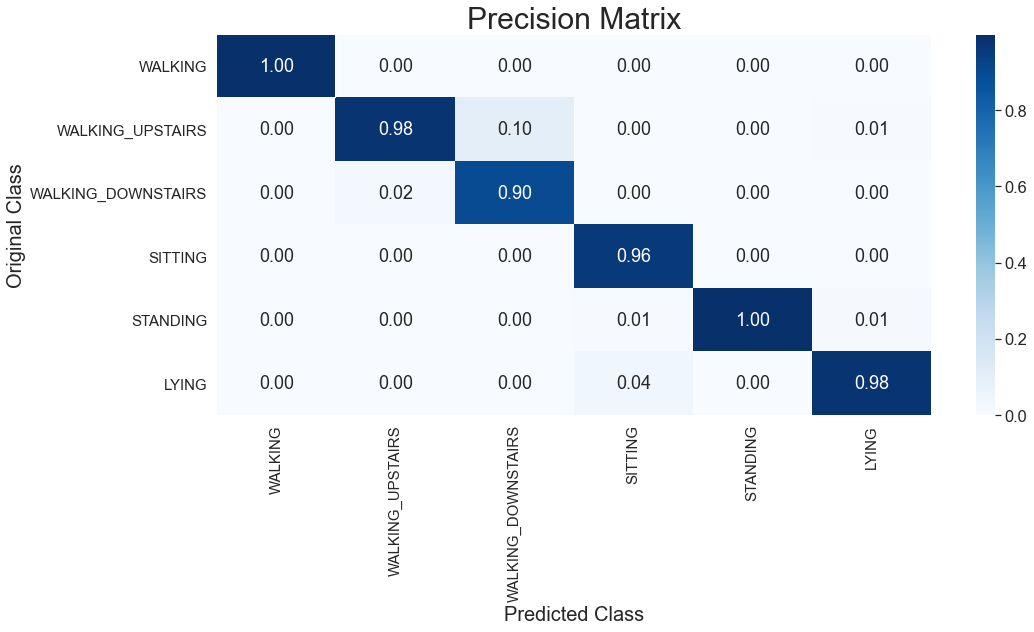

-----------------------------------------------------------------------------------------------------------------------------


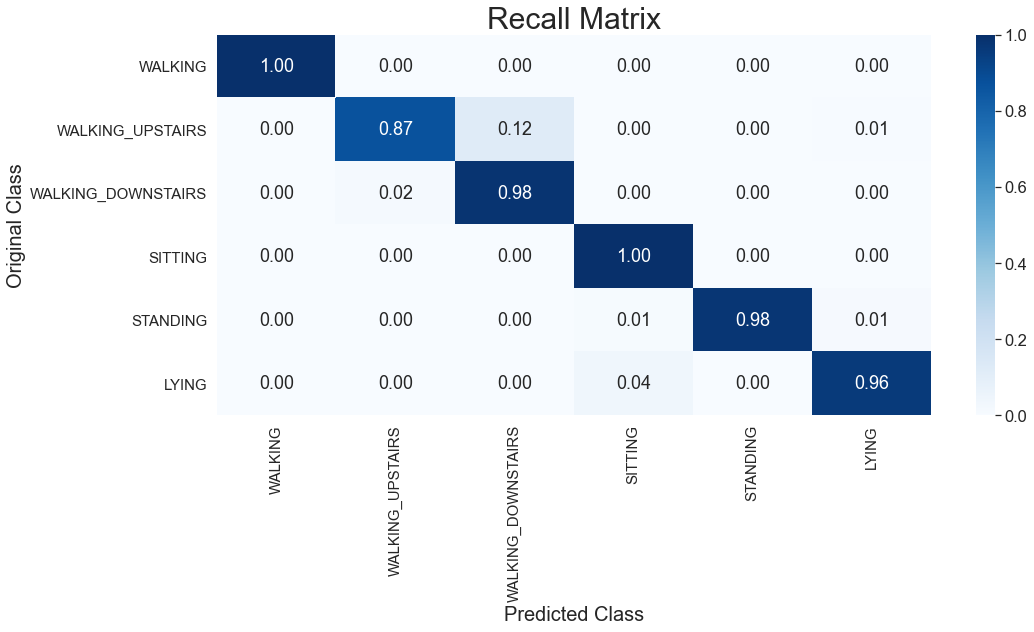

In [46]:
parameters = {"C": [0.005, 0.05, 0.20, 5, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]}
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Logistic Regression")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:00:40.259860

---------------------
|      Accuracy      |
---------------------
86.94%

---------------------------
|      Best Estimator      |
---------------------------
DecisionTreeClassifier(max_depth=8)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'max_depth': 8}





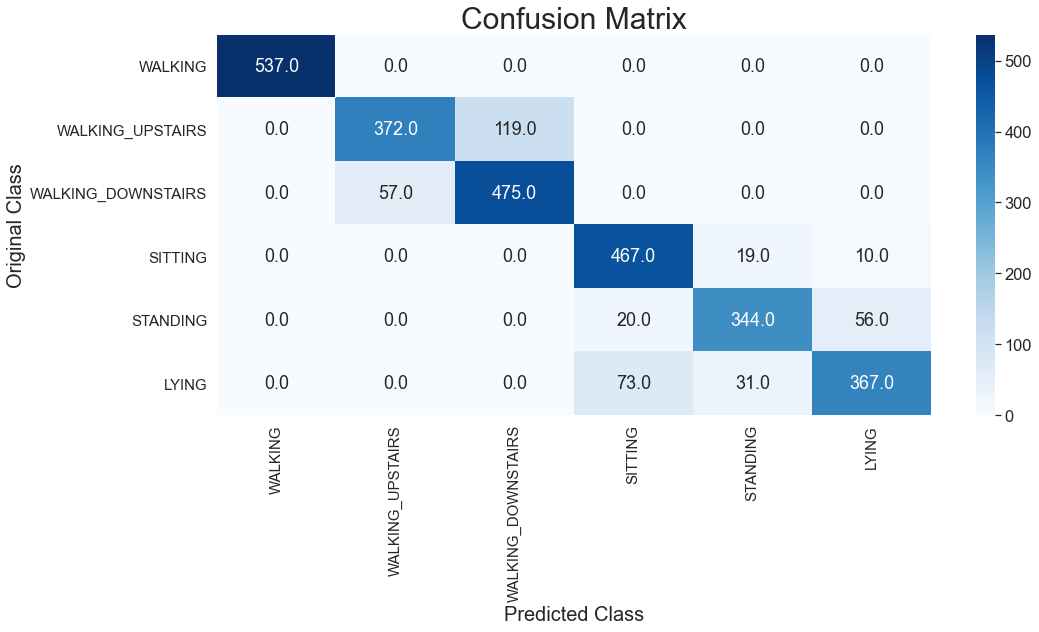

-----------------------------------------------------------------------------------------------------------------------------


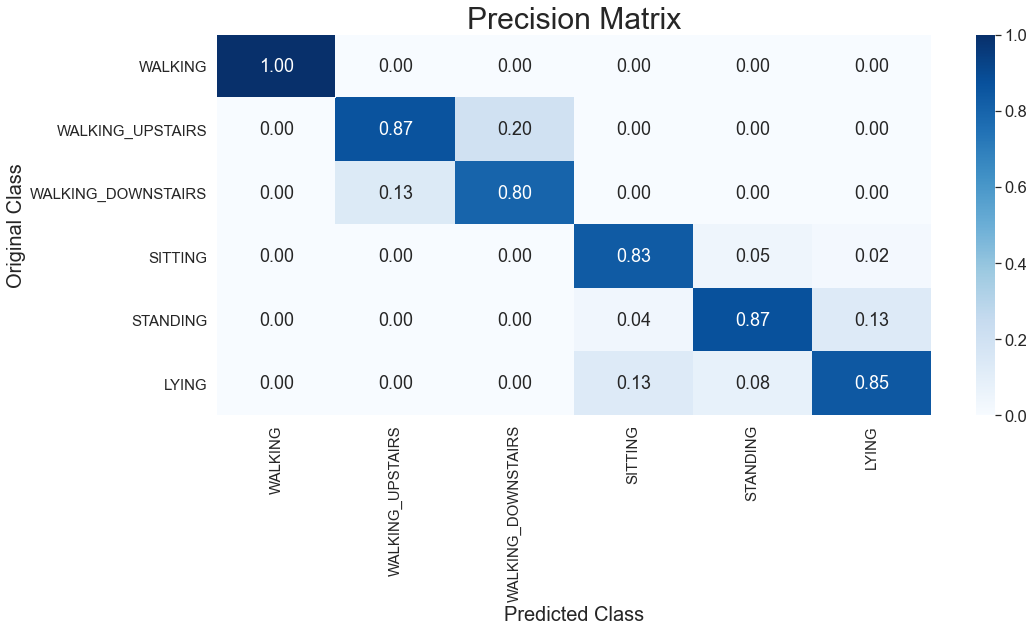

-----------------------------------------------------------------------------------------------------------------------------


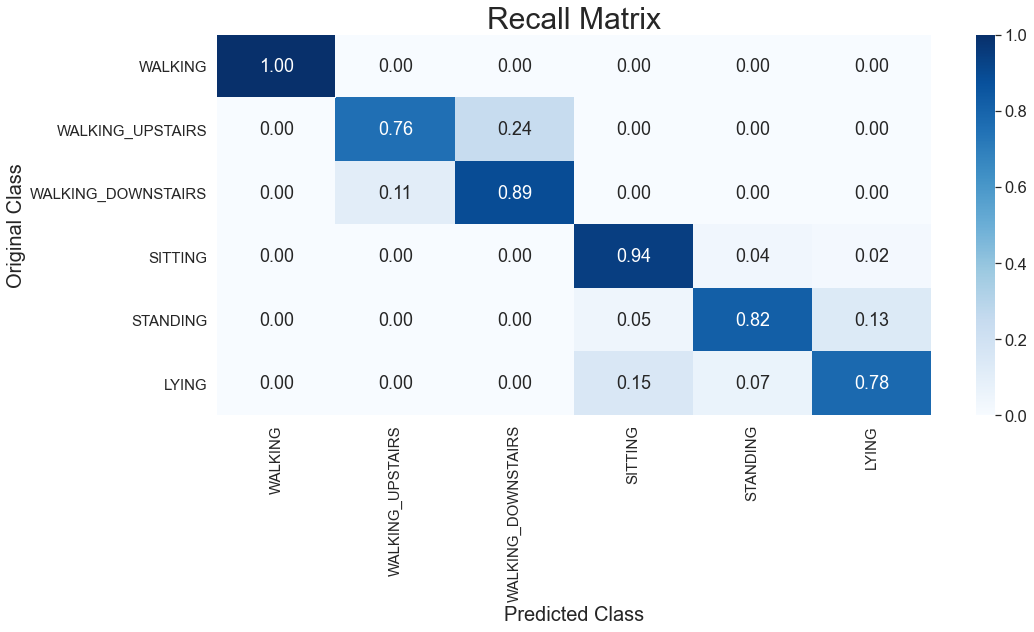

In [66]:
parameters = {"max_depth": [2, 3, 4, 5, 6, 7,8]}
clf = DecisionTreeClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Decision Trees")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:13:35.124981

---------------------
|      Accuracy      |
---------------------
92.16%

---------------------------
|      Best Estimator      |
---------------------------
RandomForestClassifier(n_estimators=50)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'n_estimators': 50}





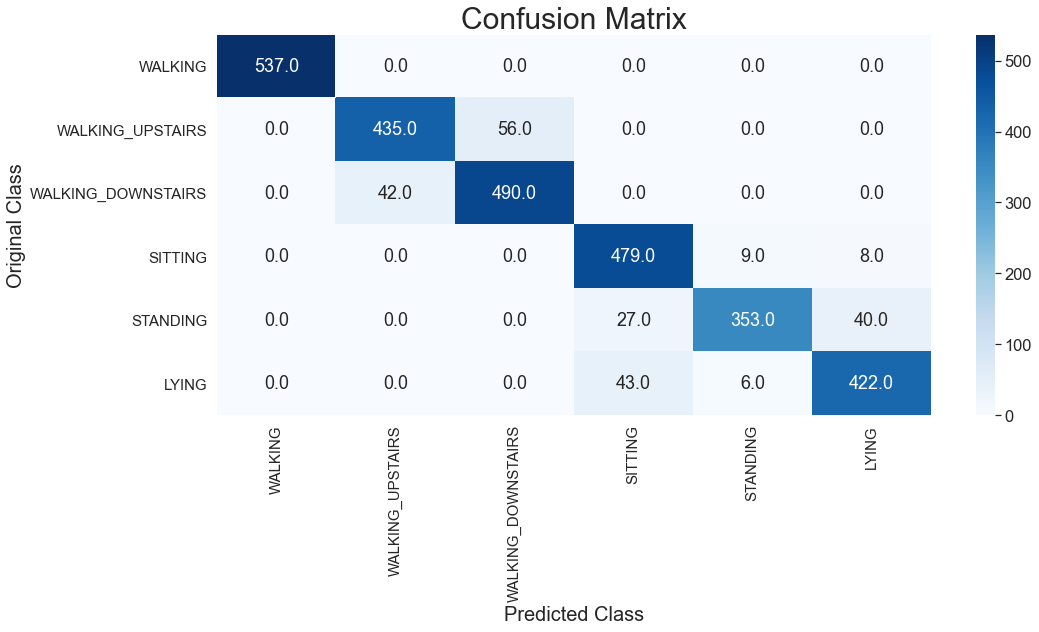

-----------------------------------------------------------------------------------------------------------------------------


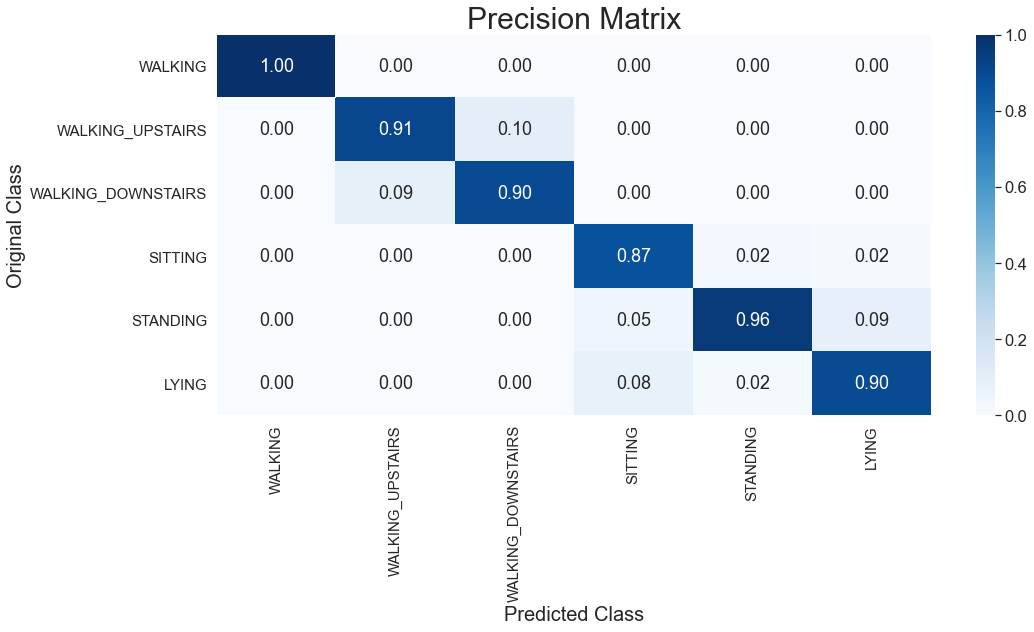

-----------------------------------------------------------------------------------------------------------------------------


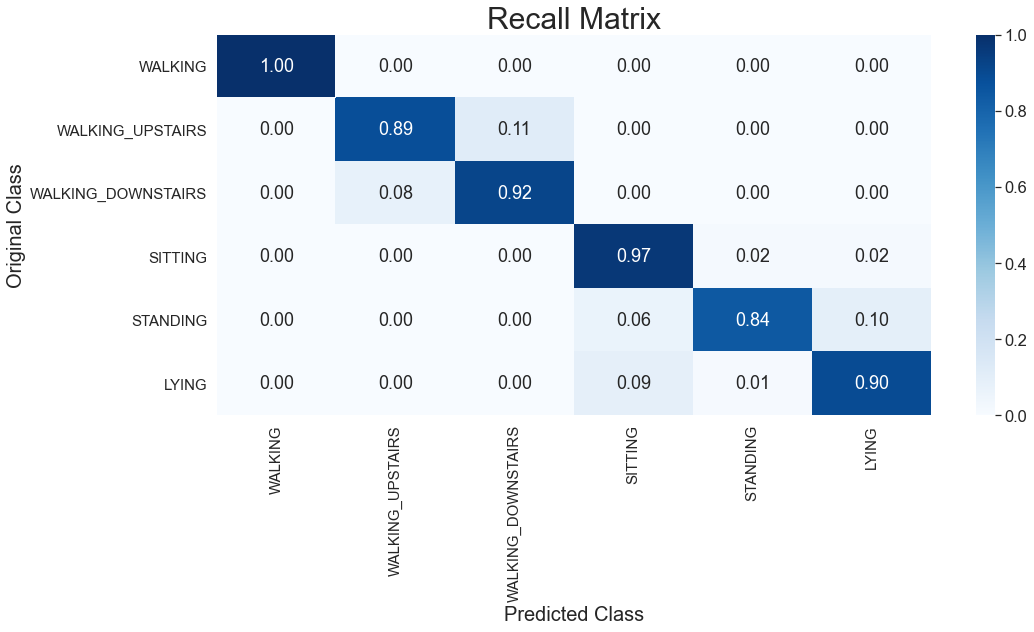

In [49]:
parameters = {"n_estimators": [50, 100, 200, 400, 600,800]}
clf = RandomForestClassifier()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Random Forest")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:02:27.283883

---------------------
|      Accuracy      |
---------------------
96.67%

---------------------------
|      Best Estimator      |
---------------------------
LinearSVC(C=100)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 100}





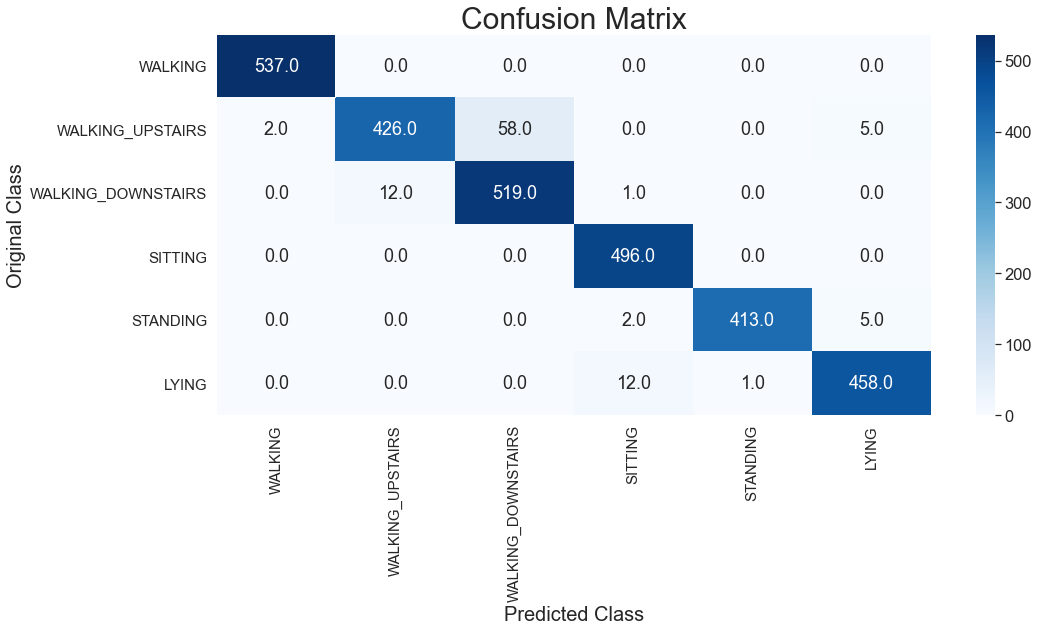

-----------------------------------------------------------------------------------------------------------------------------


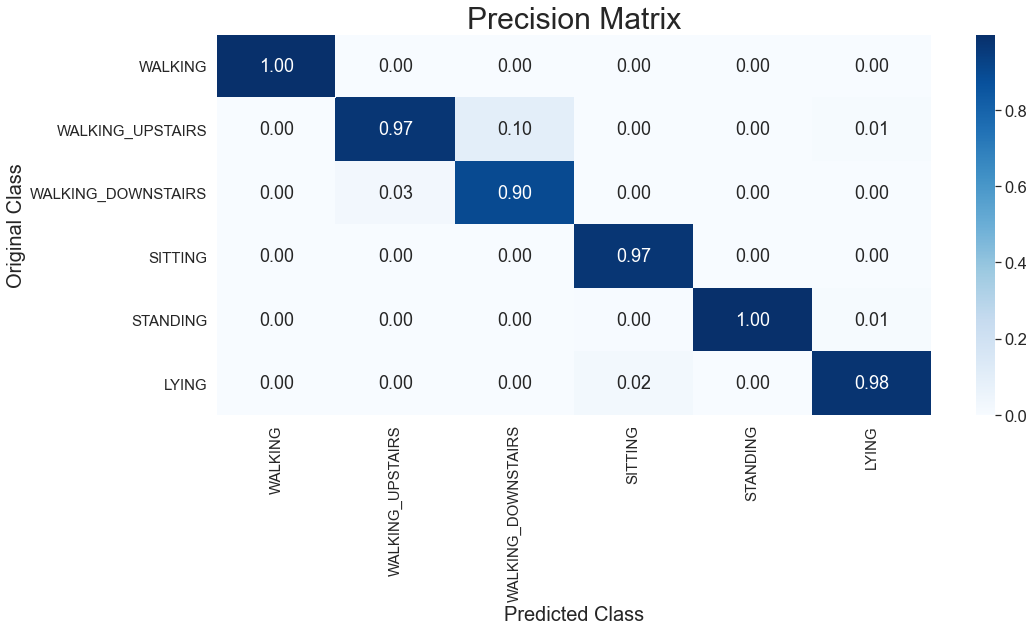

-----------------------------------------------------------------------------------------------------------------------------


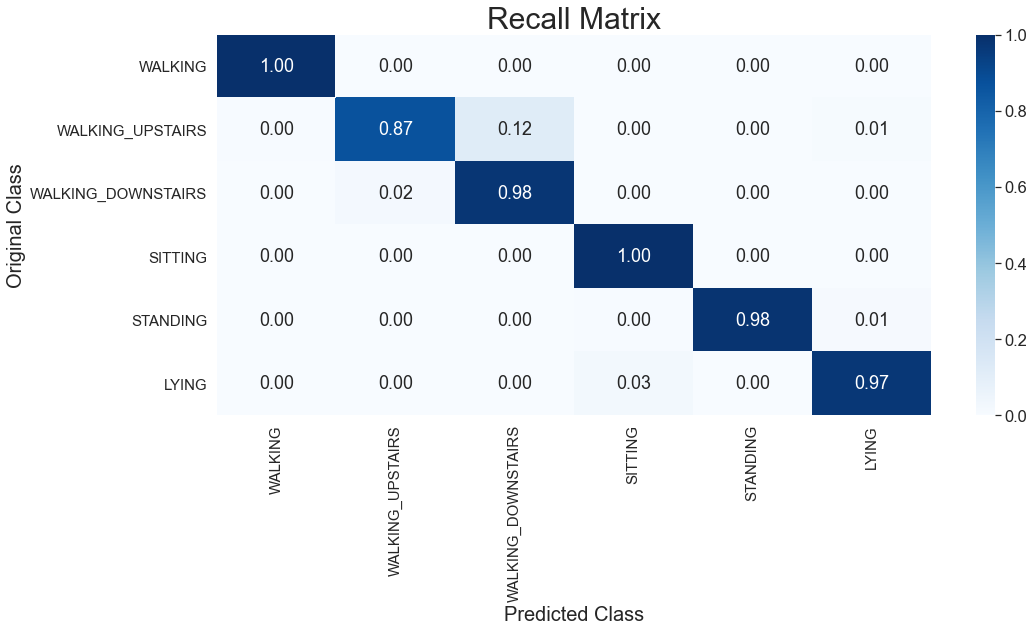

In [50]:
parameters = {"C": [0.005, 0.05, 0.5, 5, 10**1, 10**2, 10**3]}
clf = LinearSVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Linear SVM")

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:08:37.441929

---------------------
|      Accuracy      |
---------------------
96.54%

---------------------------
|      Best Estimator      |
---------------------------
SVC(C=100)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 100}





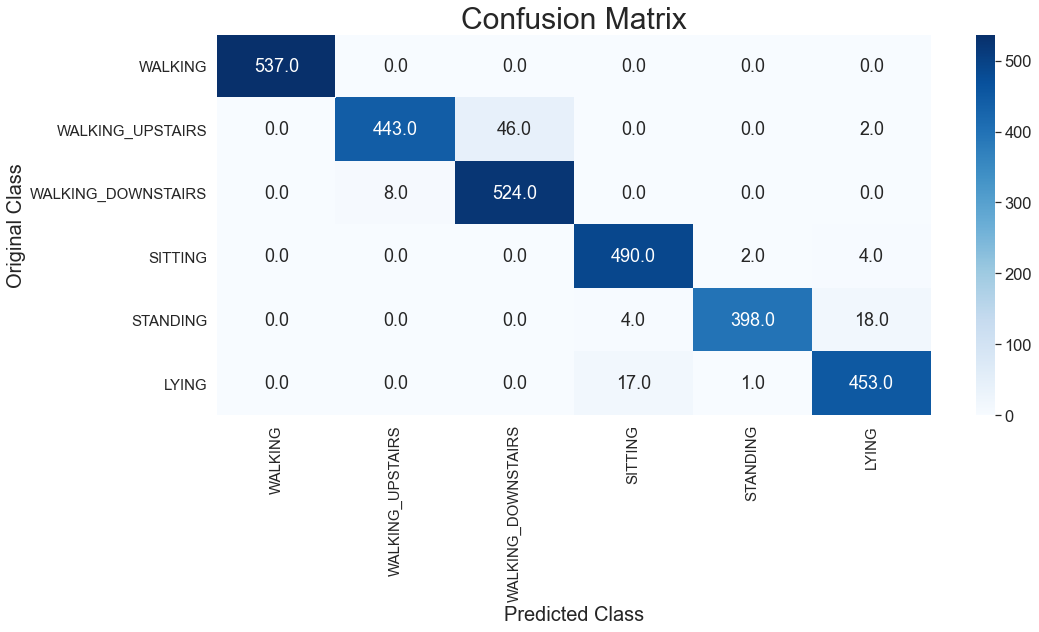

-----------------------------------------------------------------------------------------------------------------------------


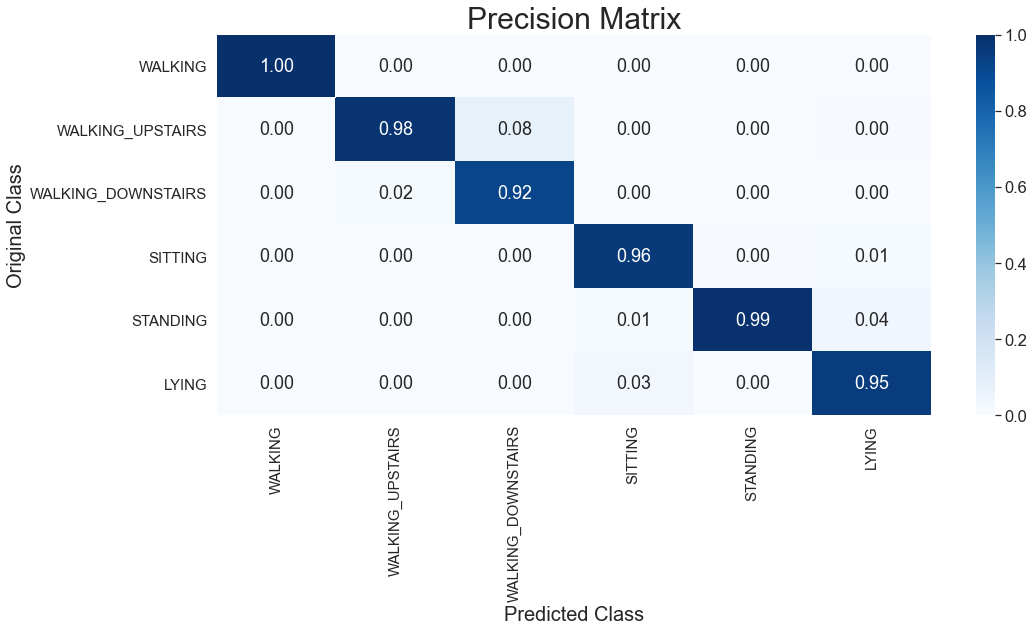

-----------------------------------------------------------------------------------------------------------------------------


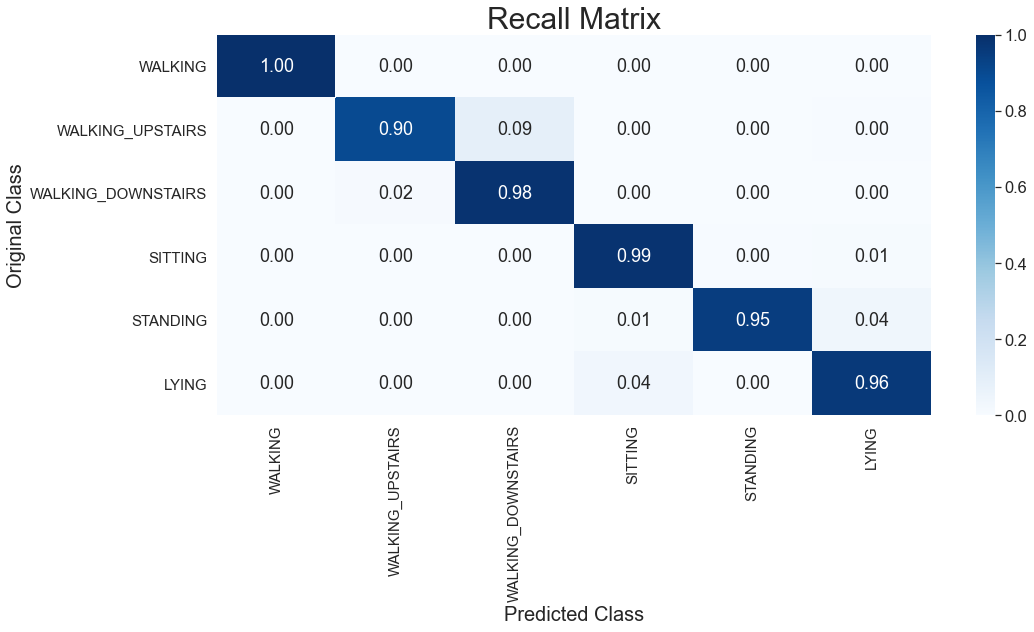

In [51]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = SVC()
cross_val = GridSearchCV(clf, parameters, cv=3)
apply_model(cross_val, x_train, y_train, x_test, y_test, "RBF SVM")

In [59]:
table

,Model,Accuracy(%)
0,Logistic Regression,96.27
1,Logistic Regression,96.47
2,Decision Trees,86.26
3,Random Forest,91.99
4,Random Forest,92.16
5,Linear SVM,96.67
6,RBF SVM,96.54


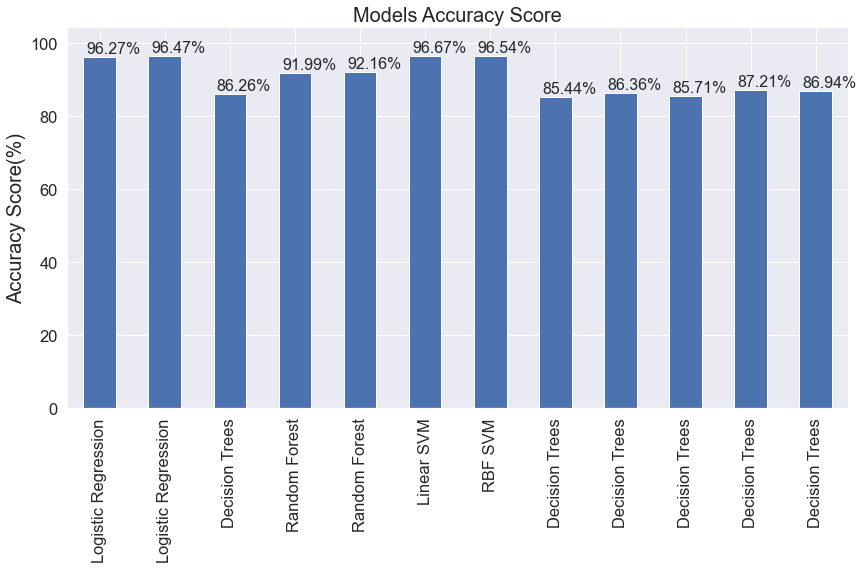

In [77]:
ax= table.plot(x = "Model", y = "Accuracy(%)", kind = "bar", figsize = (14, 7), legend = False)
plt.title("Models Accuracy Score", fontsize = 20)
plt.xlabel("")
plt.margins(x = 0, y = 0.08)
plt.ylabel("Accuracy Score(%)", fontsize = 20)
plt.grid(visible = True)
for i in ax.patches:
    ax.text(x = i.get_x()+0.05, y = i.get_height()+1, s = str(i.get_height())+"%", fontsize = 16, color = "#232b2b")


In [76]:
table


,Model,Accuracy(%)
0,Logistic Regression,96.27
1,Logistic Regression,96.47
2,Decision Trees,86.26
3,Random Forest,91.99
4,Random Forest,92.16
5,Linear SVM,96.67
6,RBF SVM,96.54
7,Decision Trees,85.44
8,Decision Trees,86.36
9,Decision Trees,85.71
